- 트랜잭션이 시작될 때마다 트랜잭션 관리자는 트랜잭션 ID(txid) 라고 하는 고유 식별자를 할당.
- PostgreSQL의 txid는 32비트 부호 없는 정수로, 약 42억(천만)입니다. 트랜잭션이 시작된 후 내장된 txid_current() 함수를 실행하면 함수는 다음과 같이 현재 txid를 반환.



```
testdb=# BEGIN;
BEGIN
testdb=# SELECT txid_current();
 txid_current
--------------
          100
(1 row)
```




- PostgreSQL은 다음 세 가지 특수 txid를 예약.
  - 0은 유효하지 않은 txid를 의미.
  - 1은 데이터베이스 클러스터 초기화에만 사용되는 Bootstrap txid를 의미.
  - 2는 Frozen txid를 의미합니다 .

- Txids는 서로 비교할 수 있음.
  - 예를 들어, txid 100의 관점에서 100보다 큰 txid는 ' 미래 '이며 txid 100에서는 보이지 않음
  - 100보다 작은 txid는 '과거'이며 표시 됨

**PostgreSQL의 트랜잭션 ID.**

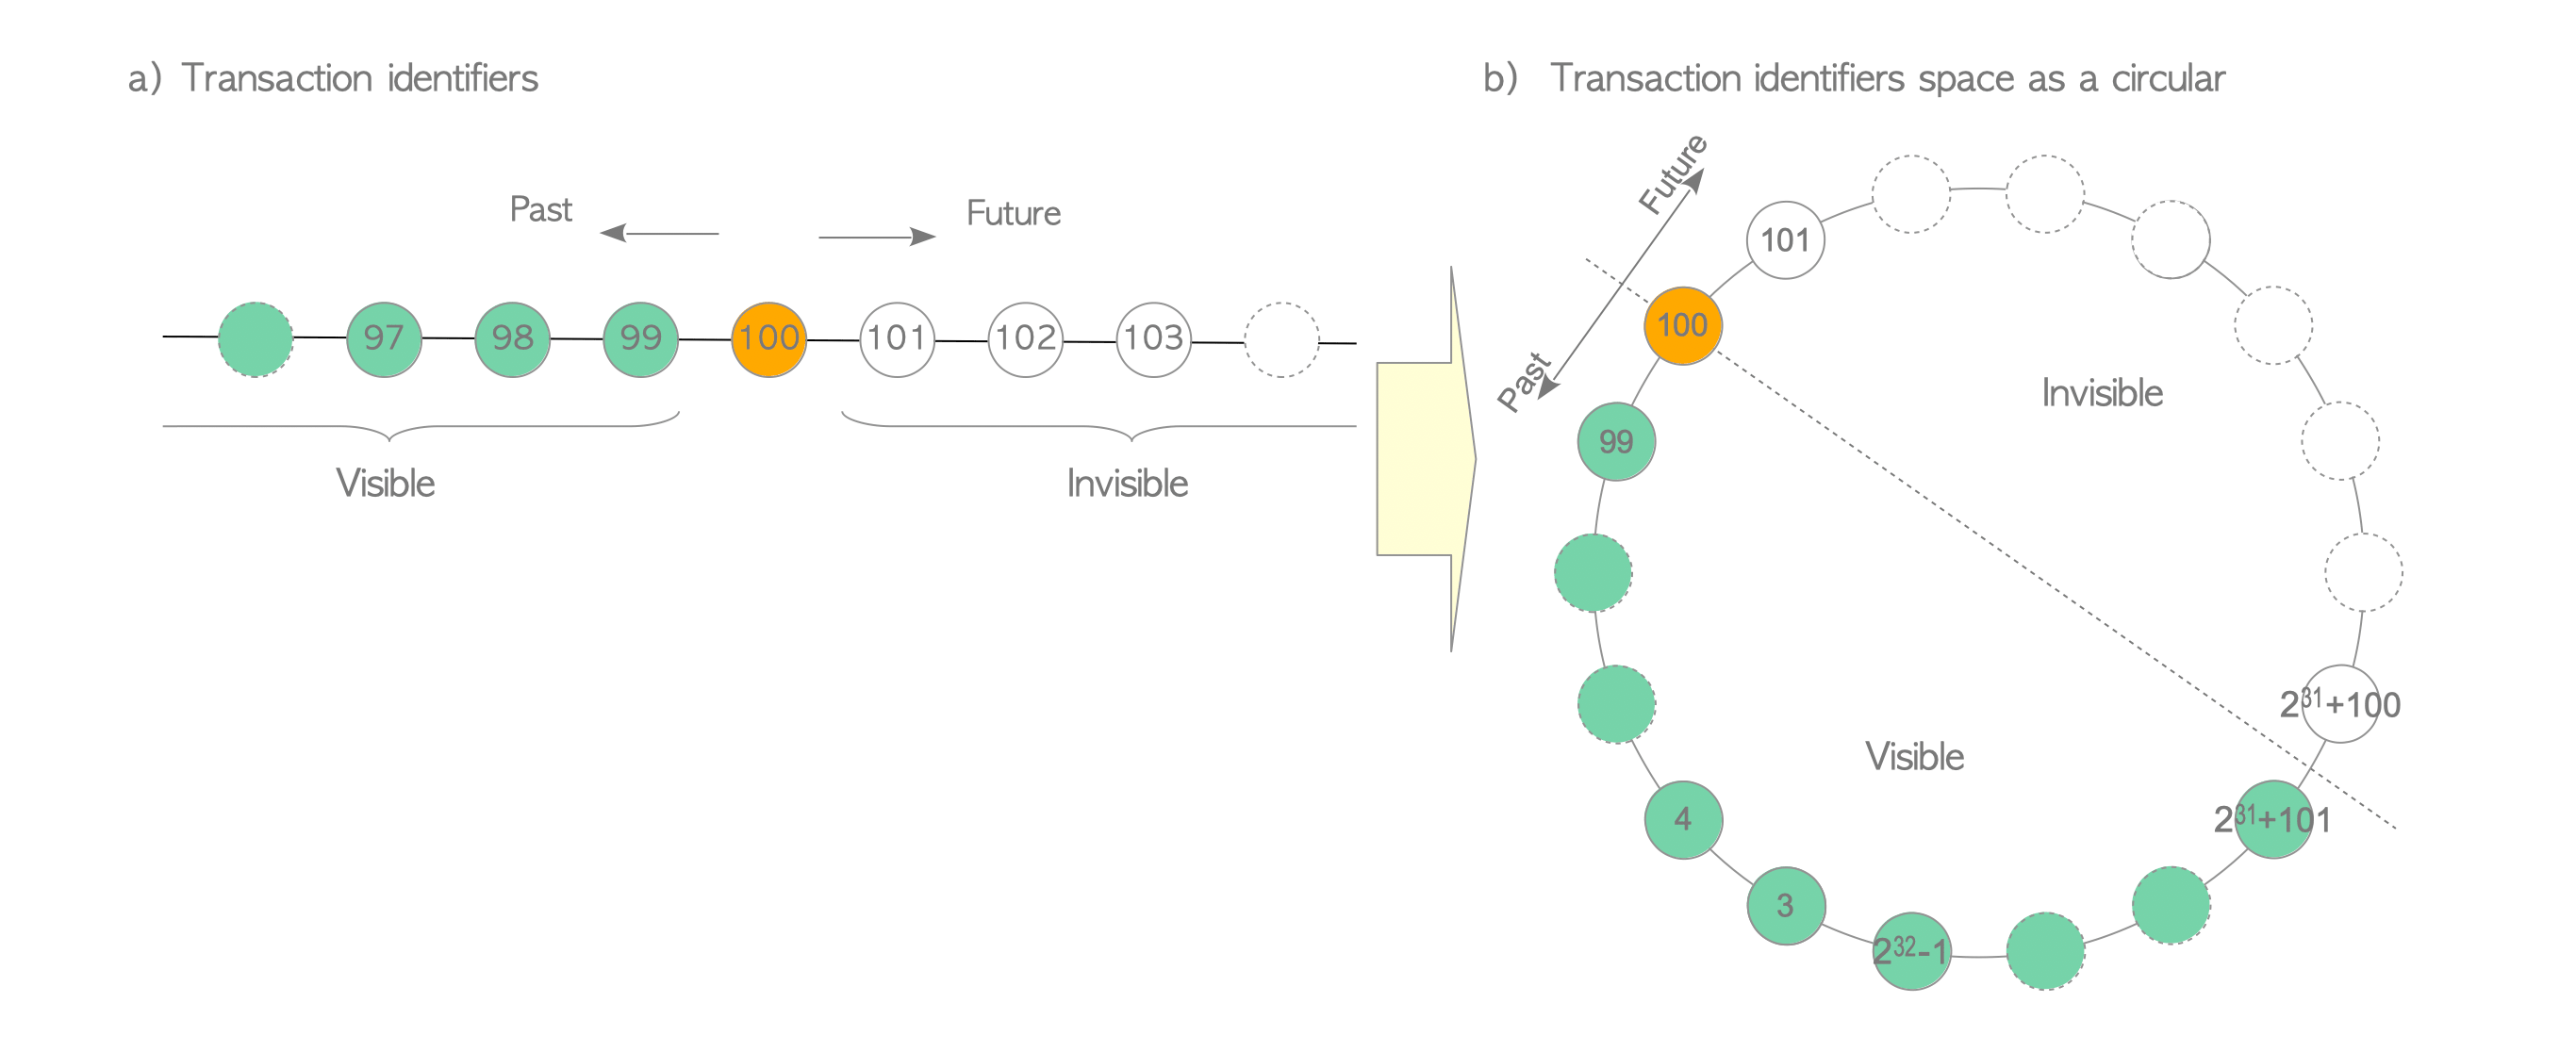

- 실제 시스템에서는 txid 공간이 부족하므로 PostgreSQL은 txid 공간을 원으로 처리.
-  이전 21억 txid는 '과거'이고, 다음 21억 txid는 '미래'입니다


- BEGIN 명령에는 txid가 할당되지 않습니다.

- PostgreSQL에서는 BEGIN 명령이 실행된 후 첫 번째 명령이 실행되면 트랜잭션 관리자가 tixd를 할당한 후 트랜잭션이 시작.